<a href="https://colab.research.google.com/github/haron1100/MLSummerSchool/blob/master/Session_7_Gradient_based_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/gdrive/My Drive/data/BikeSharingDaily.csv')

In [3]:
def mse_cost(y, y_pred):
    diffs = y-y_pred
    squared_diffs = np.square(diffs)
    mean_squared_diff = np.mean(squared_diffs)
    return mean_squared_diff

In [37]:
features = [df['temp'], df['hum'], df['windspeed'], df['numpigeons']]
x = np.stack(features, axis=1)
y = np.array(df['cnt'])

def normalize(x):
    xnorm= np.copy(x)
    for i in range(x.shape[1]):
        this_column = x[:, i]
        my_mean, my_std = np.mean(this_column), np.std(this_column)
        xnorm[:, i] = (this_column-my_mean)/my_std
    return xnorm
x_norm = normalize(x)

y_mean, y_std = np.mean(y), np.std(y) #output normalization
y_norm = (y-y_mean)/y_std# normalized version of y

In [38]:
#linear model
#y = m * x + b
def gradient_descent(x, y, n_iterations=100, learning_rate=0.003):
    #randomly initialise model parameters
    m = np.random.randn(x.shape[1])
    b = np.random.randn()
    for i in range(n_iterations): #for each iteration
        y_pred = np.zeros(len(y))
        for j in range(x.shape[1]):
            y_pred += x[:, j] * m[j]
        y_pred += b
        
        c = mse_cost(y, y_pred)#calculate the cost of the prediction
        
        #for each parameter
        for j in range(x.shape[1]):
            m_grad = 2*np.mean( (y_pred-y) * x[:, j] ) #calculate the derivative of the cost w.r.t the parameter
            m[j] -= learning_rate*m_grad#update the value of the parameter by taking a step opposite of the gradient, proportional to the learning rate

        b_grad = 2*np.mean( y_pred-y ) #calculate the derivative of the cost w.r.t the parameter
        b -= learning_rate*b_grad#update the value of the parameter by taking a step opposite of the gradient, proportional to the learning rate

    return m, b

found parameters m: [ 0.62625396 -0.2169839  -0.19160858 -0.0231001 ] b: -6.77469655221227e-17
cost 2018818.092550066


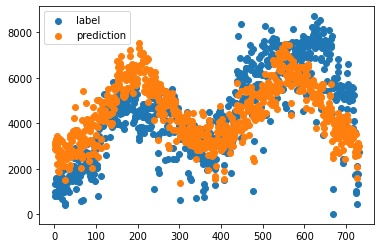

In [40]:
m, b = gradient_descent(x_norm, y_norm, 1000, 0.3)

y_pred = np.zeros(len(y))
for j in range(x.shape[1]):
    y_pred += x_norm[:, j] * m[j]
y_pred += b

y_pred = (y_pred*y_std) + y_mean

cost = mse_cost(y, y_pred)
print('found parameters m:',m , 'b:', b)
print('cost', cost)
plt.scatter(df['instant'], y, label="label")
plt.scatter(df['instant'], y_pred, label="prediction")
plt.legend()
plt.show()